4-2장에서는 기존에 7개의 클래스에 대한 학습이 가능한 모델을 설계했는데 서비스가 점점 커지면서 클래스가 추가될 상황에 놓이게되었다. 하지만 데이터는 재공해겠다곤 하는데 언제 어떤 데이터 들어올지와 훈련데이터가 한번에 준비되는것이 아니라 조금씩 전달 되어 매번 충분한양의 데이터가 쌓이기를 마냥 기다릴순없는 노릇이고 시간이 지날수록 데이터가 늘어나 수시로 새로운 데이터를 활용해 모델을 훈련할 수 없기때문에 이를 해결하기 위해 확률적 경사 하강법(Stochastic Gradient Descent)을 도입하기로 한다.
<br><br>
-확률적 경사 하강법(Stochastic Gradient Descent 스토캐스틱,그래디언트,디센트) <br>
확률적 경사 하강법에서 확률적이란 말은 '무작위하게' 혹은 '랜덤하게'의 기술적 표현이다. 경사는 '경사가 가파르다'할때의 경사 즉 기울기를 뜻한다.
<br>다시말해 경사 하강법은 경사를 따라 내려가는 방법을 말한다.
<br><br>
그럼 조금만 생각해보면 훈련을 시키고 원하는 결과가 나올때 까지 천천히 무언가를 조정한다고 볼 수있고 다만 그 원하는 결과까지 도달하기까지 무자비하게 나아가는게 아니고 조금씩 위험하지 않은선에서 최대한 최적점에 천천히 내려간다고 보면될거같다(산에서 무조건 내려가기위해 엄청 가파른 내리막길을 선택하면 안되듯) 근데 뭘 내려간다는건지?...

경사 하강법으로 내려올때 가장 가파른 길을 찾는 방법은 무엇인가?? 훈련세트를 사용해 모델을 훈련시키기 때문에 경사 하강법도 당연히 훈련세트를 사용하여 가장 가파른 길을 찾을것이다. 그런데 전체 샘플을 사용하지 않고 딱 하나의 샘플을 훈련세트에서 랜덤하게 골라 가장 가파른 길을 찾는다. **이처럼 훈련 세트에서 랜덤하게 하나의 샘플을 고르는 것이 확률적 경사 하강법이다.**
그리하여 전체 샘플을 전부다 사용하면 1에포크(Epoch)라고 부른다
일반적으로 경사 하강법은 수십 수백번 이상 에포크를 수행한다.

그리고 샘플을 한개씩 꺼내서 쓰는게 보통 확률적 경사 하강법이라고 하고
여러개씩 꺼내서 쓰는걸 미니배치 경사 하강법(Minibatch gradient descent)이라 하며 극단적으로 몽땅 꺼내서 쓰는것을 배치 경사 하강법(Batch gradient descent)라고 한다. 배치 경사 하강법은 전체 데이터를 사용하기 때문에 가장 안정적인 방법이지만 그만큼 컴퓨터 자원을 많이 사용하게 된다.(거의 사용하지 않음)<br><br>

즉 확률적 경사 하강법은 훈련데이터가 모두 준비되어있지 않고 매일매일 업데이트되어도 학습을 계속 이어나갈 수 있다**.(신경망 알고리즘에 사용을 많이한다)**

-손실함수(loss function)는 어떤 문제에서 머신러닝 알고리즘이 얼마나 엉터리인지 측정하는 기준이다.그렇다면 손실 함수의 값이 적을수록 좋다고 볼 수 있다.
하지만 어떤 값이 최소값인지 알지 못하기 때문에 가능한 많이 찾아보고 만족할만한 수준의 값이 나와야한다.
<br><br>
분류에서 손실은 아주 명확하다. 즉 정답을 못맞추는것이다.
예를들어 도미와 빙어를 구분하는 이진 분류의 경우 도미는 양성클래스(1), 빙어는 음성클래스(0)이라고 가정시 <br>
예측 과 정답<br>
1    =   1<br>
0   !=   1<br>
0   =    0<br>
1   !=   0<br>
일경우 정확도는 4개의 예측중 2개를 맞았으므로 1/2 = 0.5이다<br>
정확도를 손실 함수로 사용할수있는가? 예를들어 정확도에 음수를 취하면 -1.0이 가장 낮고 -0.0이 가장 높다 하지만 정확도에는 치명적인 단점이 있다 <br>
예를들어 4개의 샘플만 있다면 가능한 정확도는 0, 0.25, 0.5, 0.75, 1 다섯가지뿐이기 때문에 앞에서 경사 하강법을 사용할때 조금씩 내려온다는 것에는 동의할수없기때문이다. 이렇게 정확도가 듬성듬성하다면 경사 하강법을 이용해 조금씩 움직일수없다.
<br>
그럼 어쩌냐? 4-1에 로지스틱 회귀에서 예측이 0또는 1이지만 0~1사이의 어떤값도 될수있어 연속적이기 때문에 사용가능할것이다


-로지스틱 손실 함수(logistic loss function) or 이진 크로스엔트로피 손실 함수(binary cross-entropy loss function)<br>

양성클래스(타깃 = 1)일때 손실을 -log(예측 확률)로 계산하고 확률이 1에서 멀어질수록 손신은 아주 큰 양수가 된다.음성 클래스(타깃 = 0)일 때 손실은 -log(1-예측확률)로 계산하고 이 예측 확률이 0에서 멀어질수록 손실은 아주 큰 양수가 된다.<br><br>





※다중분류에서 사용하는 손실함수는 크로스엔트로피 손실 함수(cross-entropy loss function)라고 한다.
<br><br>
※회귀의 손실함수는 평균 절대값 오차를 사용할 수 있다(타깃에서 예측을 뺀 절대값을 모든 샘플에 평균한 값) 또는 평균 제곱 오차(mean squared error)를 많이 사용한다.(타깃에서 예측을 뺀 값을 제곱한 다음 모든 샘플에 평균한 값)<br>
이값이 작을수록 좋은 모델이다.

In [24]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()


from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input,fish_target,random_state=42)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)


from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss = 'log', max_iter=10, random_state=42)
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

import numpy as np
sc = SGDClassifier(loss='log', random_state = 42)
train_score = []
test_score = []
classes = np.unique(train_target)


0.773109243697479
0.775
0.8151260504201681
0.825


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


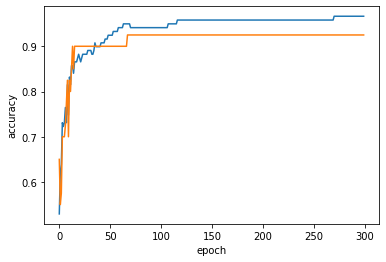

0.957983193277311
0.925


In [31]:
import numpy as np
sc = SGDClassifier(loss='log', random_state = 42)
train_score = []
test_score = []
classes = np.unique(train_target)

for _ in range(0, 300):
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

sc = SGDClassifier(loss='log', max_iter = 100, tol= None , random_state=42)
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))